In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('data/vehicles.csv')

In [4]:
df.dropna(subset=['model']).shape

(421603, 26)

In [5]:
def filter_by_names(*args):
    def filter_data(model):
        for keyword in args:
            if keyword not in model:
                return False
        return True
    return filter_data

In [6]:
models = ['camry', 'accord', 'sentra', 'sonata']

In [7]:
model_variants = []
for model in models:
    filter_func = filter_by_names(model)
    model_variants += list(df[df['model'].astype(str).apply(filter_func)].groupby('model').count().index)

In [16]:
sedan_df = df[df['model'].isin(model_variants)]

In [17]:
def replace_model(current_model_name):
    for model in models:
        if model in current_model_name:
            return model

In [18]:
sedan_df['correct_model'] = sedan_df['model'].apply(replace_model)

/tmp/ipykernel_6580/1867422377.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sedan_df['correct_model'] = sedan_df['model'].apply(replace_model)


In [19]:
sedan_df.loc[sedan_df['correct_model'] == 'camry', 'manufacturer'] = 'toyota'
sedan_df.loc[sedan_df['correct_model'] == 'sentra', 'manufacturer'] = 'nissan'
sedan_df.loc[sedan_df['correct_model'] == 'accord', 'manufacturer'] = 'honda'
sedan_df.loc[sedan_df['correct_model'] == 'sonata', 'manufacturer'] = 'hyundai'

In [20]:
sedan_df['posting_year'] = sedan_df['posting_date'].apply(lambda date: date[:4])
sedan_df['age'] = sedan_df['posting_year'].astype(int) - sedan_df['year']
sedan_df = sedan_df[sedan_df['fuel'] == 'gas']
sedan_df = sedan_df[sedan_df['title_status'] == 'clean']
sedan_df = sedan_df[sedan_df['price'] > 500]
sedan_df['model'] = sedan_df['correct_model']

/tmp/ipykernel_6580/4079187954.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sedan_df['posting_year'] = sedan_df['posting_date'].apply(lambda date: date[:4])
/tmp/ipykernel_6580/4079187954.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sedan_df['age'] = sedan_df['posting_year'].astype(int) - sedan_df['year']


In [21]:
sedan_df.drop(columns=['id', 'url', 'region_url', 'VIN', 
                       'size', 'image_url', 'description', 
                       'lat', 'long', 'correct_model', 'posting_date',
                       'type', 'region', 'cylinders', 
                       'fuel', 'title_status', 'county'], inplace=True)

In [22]:
sedan_df.head()

,price,year,manufacturer,model,condition,odometer,transmission,drive,paint_color,state,posting_year,age
100,16590,2015.0,hyundai,sonata,good,26655.0,other,fwd,white,al,2021,6.0
133,18590,2018.0,hyundai,sonata,good,22075.0,other,fwd,white,al,2021,3.0
141,18590,2017.0,toyota,camry,good,30223.0,other,fwd,silver,al,2021,4.0
150,10990,2013.0,nissan,sentra,good,81557.0,other,fwd,red,al,2021,8.0
190,4299,2007.0,nissan,sentra,NaN,189321.0,automatic,fwd,silver,al,2021,14.0


In [23]:
sedan_df.to_csv('processed_data/midsize_sedan.csv', index=None)

### Trial code

In [37]:
data_df = sedan_df[['price', 'odometer', 'age']]
data_df.dropna(inplace=True)

/tmp/ipykernel_8423/3933781057.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df.dropna(inplace=True)


In [38]:
y = data_df['price']
X = data_df[['odometer', 'age']]

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
reg = LinearRegression().fit(X_train, y_train)

In [43]:
reg.score(X_train, y_train)

0.604586807052099

In [47]:
y_pred = reg.predict(X_train)
y_pred_test = reg.predict(X_test)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(0.0, 40000.0)

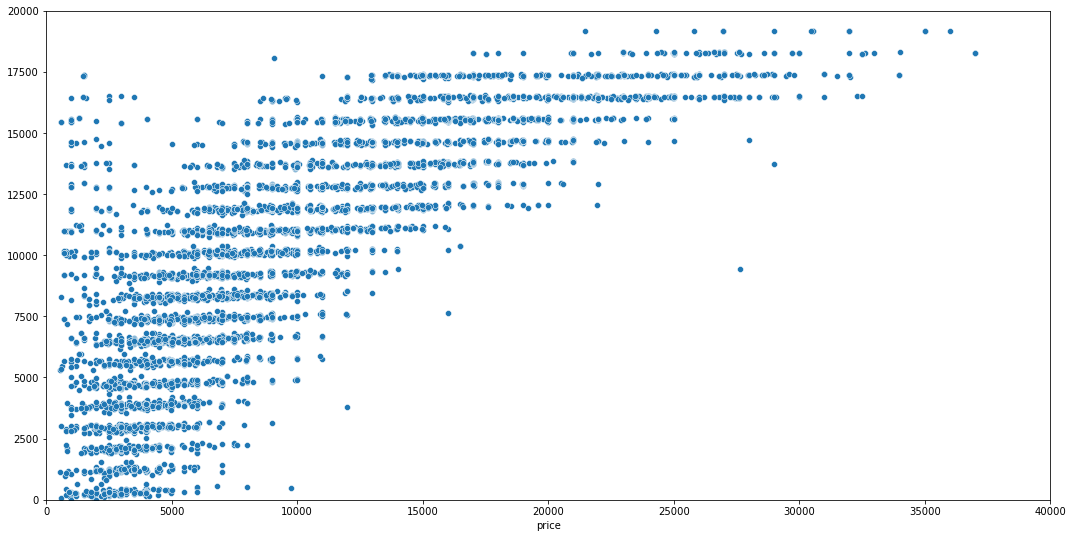

In [55]:
plt.figure(figsize=(18, 9))
sns.scatterplot(y_train, y_pred)
plt.ylim(0, 20000)
plt.xlim(0, 40000)

### XGBoost modeling

In [60]:
from xgboost import XGBRegressor

In [61]:
model = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)

In [62]:
zz

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, early_stopping_rounds=None,
             enable_categorical=False, eta=0.1, eval_metric=None,
             feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, predictor=None, ...)

In [63]:
y_pred = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [67]:
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error

In [70]:
mean_absolute_percentage_error(y_test, y_pred_test)

0.3378685077207414

<AxesSubplot:xlabel='price', ylabel='Count'>

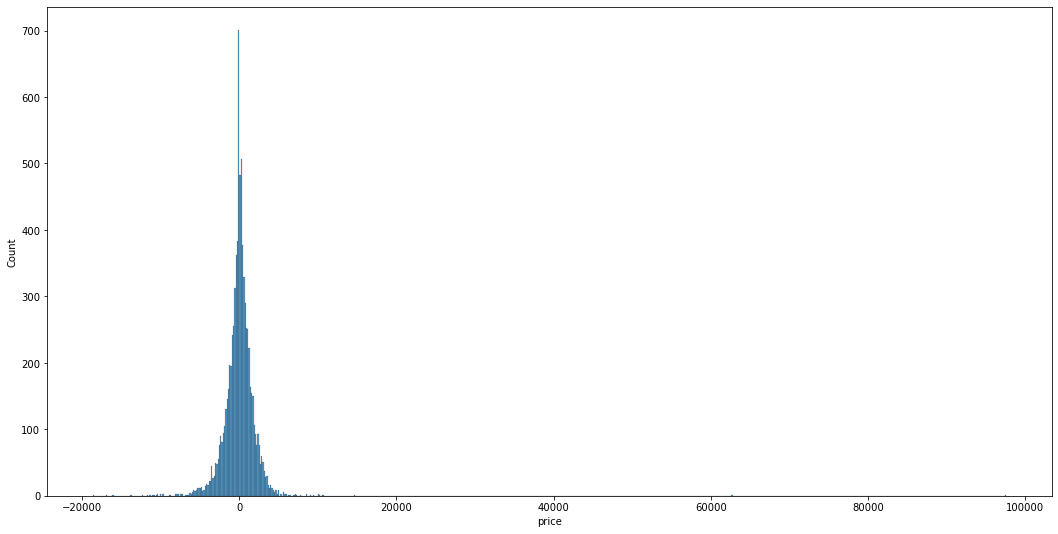

In [72]:
plt.figure(figsize=(18, 9))
sns.histplot(y_train - y_pred)